# Sistema anti-copia para la detección del uso de herramientas de chat en tiempo real.
# Modelado

## 1. Librerias

In [1]:
%reset
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\pablo\miniconda3\envs\tfm\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2. Lectura y preparación de datos

In [2]:
def read_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    b,g,r = cv2.split(image)
    return  cv2.merge([r,g,b])

#result = read_image('C:/Users/pablo/Documents/Master Big Data/0-Trabajo de Fin de Master/Repositorio Git/TFM-Big-Data/data/processed/Normal/image3.png')#(2560, 1440)(1920, 1080)
#plt.imshow(result)
#plt.show()
#print(result.shape)

In [3]:
procesed_images_path = 'C:/Users/pablo/Documents/Master Big Data/0-Trabajo de Fin de Master/Repositorio Git/TFM-Big-Data/data/processed'

In [4]:
X = []
y = []

for folderName in os.listdir(procesed_images_path):
    for imageName in os.listdir(procesed_images_path+'/'+folderName):
        X.append(read_image(procesed_images_path+'/'+folderName+'/'+imageName))
        if(folderName=='Normal'):
            y.append(0)
        elif(folderName=='Whatsapp'):
            y.append(1)
        else:
            print('ERROR: There is an image from a not considered folder. Please check.')

print(len(X))
print(len(y))


305
305


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


print(len(X_train))
print(X_train[0].shape)
print(len(X_test))
print(len(y_train))
print(len(y_test))

244
(96, 198, 3)
61
244
61


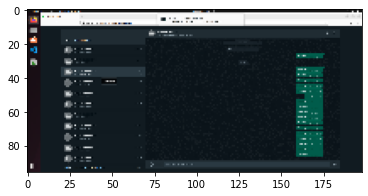

[[[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [ 95  95  95]
  [ 19  19  19]
  [ 19  19  19]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  11  17]
  ...
  [255 255 255]
  [ 19  19  19]
  [ 19  19  19]]

 [[ 24  14  21]
  [ 24  14  21]
  [ 24  14  21]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 31  18  25]
  [ 31  18  25]
  [238 238 236]
  ...
  [ 17  27  33]
  [ 17  27  33]
  [ 17  27  33]]

 [[ 31  18  25]
  [ 31  18  25]
  [ 35  19  28]
  ...
  [ 17  27  33]
  [ 17  27  33]
  [ 17  27  33]]

 [[ 31  18  25]
  [ 31  18  26]
  [ 35  20  28]
  ...
  [ 17  27  33]
  [ 17  27  33]
  [ 17  27  33]]]
(96, 198, 3)


In [17]:
img = 5

plt.imshow(X_train[img])
plt.show()
print(X_train[img])
print(X_train[img].shape)

## 3. Construccion del modelo

In [18]:
tipos = np.unique(y_train)
learning_rate = 0.0001
n_repeticiones = 250
batch_size = 16

In [36]:
#Creacion de la red
model = Sequential()

#Parte de la red CNN

model.add(Conv2D(30, kernel_size=(3, 3), padding="same", input_shape=(96, 198, 3), activation="relu"))#Capa con las neuronas 1080, 1920, 3
model.add(Conv2D(30, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first")) #Capa de pooling
#model.add(Dropout(0.5)) #Desconectar porcentaje de conexiones entre capas

model.add(Conv2D(60, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(60, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
#model.add(Dropout(0.5))

model.add(Conv2D(120, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(120, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
#model.add(Dropout(0.5))

model.add(Conv2D(240, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(240, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Dropout(0.5))


#Parte de la red MLP

model.add(Flatten()) #Unimos la CNN con el MLP

model.add(Dense(500, activation="relu"))
#model.add(Dropout(0.5)) 

model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.5)) 

model.add(Dense(len(tipos), activation = "softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=["accuracy"])
#model.save('tfm_model.h5')
print("Terminado")

Terminado


In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 96, 198, 30)       840       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 96, 198, 30)       8130      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 96, 99, 15)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 96, 99, 60)        8160      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 96, 99, 60)        32460     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 96, 49, 30)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 96, 49, 120)      

## 4. Entrenamiento del modelo

In [38]:
print(X_train.shape)
print(y_train.shape)

(244, 96, 198, 3)
(244,)


In [39]:
#Criterio de parada del entrenamiento loss ≤ 0,2
epo = 0
X_train_norm = [x / 255 for x in X_train]
while True:
    epo = epo+1
    fit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size = batch_size)#, validation_split= 0.2
    if(fit.history['loss'][0]<=0.2 or epo == n_repeticiones):
        break
print("\nNumero de epochs realizados: ", epo)

16/16 [==============================] - 1s 42ms/step - loss: 0.1075 - accuracy: 0.9713 - val_loss: 0.2364 - val_accuracy: 0.8525

Numero de epochs realizados:  8


## 4. Análisis de resultados (Métricas)

In [40]:
prediccion = model.predict(X_test)

Prueba: 1


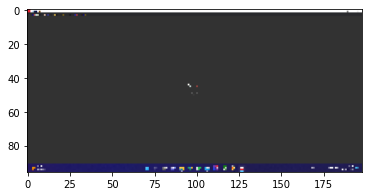

La predicción es:
 [0.91181445 0.0881856 ]


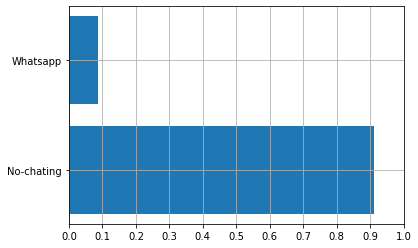


-----------------------------------------------------------------------------------------------------------------

Prueba: 2


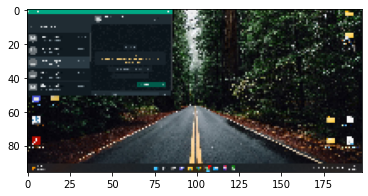

La predicción es:
 [0.02988295 0.97011703]


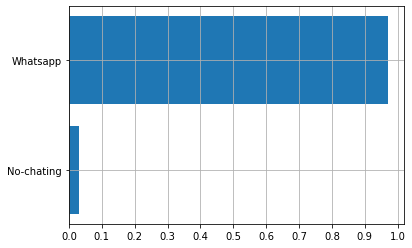


-----------------------------------------------------------------------------------------------------------------

Prueba: 3


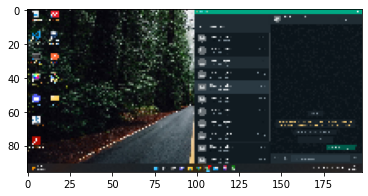

La predicción es:
 [0.03586209 0.9641379 ]


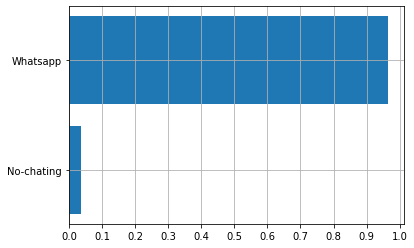


-----------------------------------------------------------------------------------------------------------------

Prueba: 4


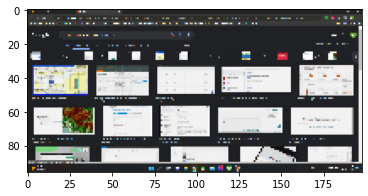

La predicción es:
 [0.68833727 0.31166276]


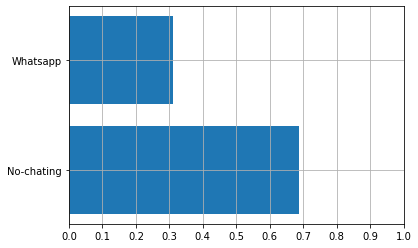


-----------------------------------------------------------------------------------------------------------------

Prueba: 5


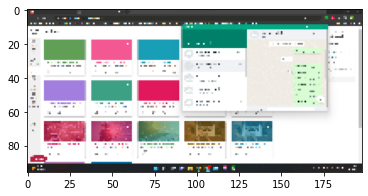

La predicción es:
 [0.00802757 0.99197245]


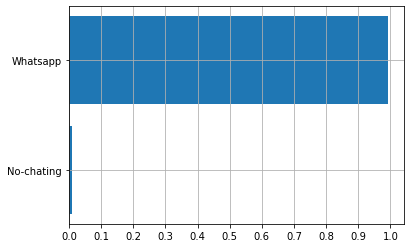


-----------------------------------------------------------------------------------------------------------------

Prueba: 6


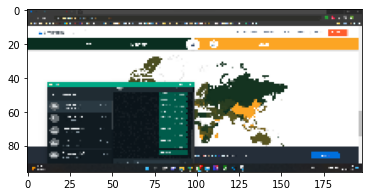

La predicción es:
 [0.01802152 0.9819785 ]


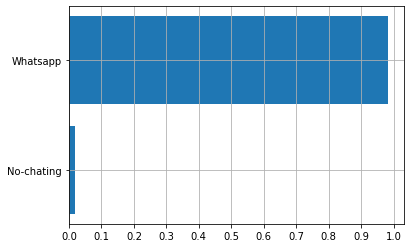


-----------------------------------------------------------------------------------------------------------------

Prueba: 7


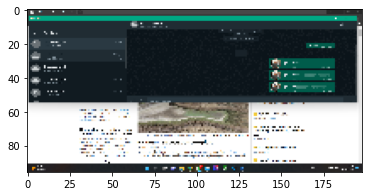

La predicción es:
 [0.00285623 0.9971438 ]


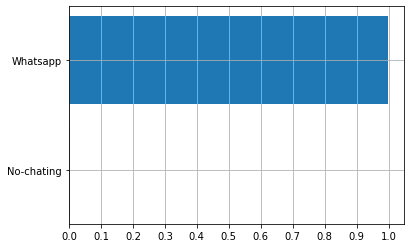


-----------------------------------------------------------------------------------------------------------------

Prueba: 8


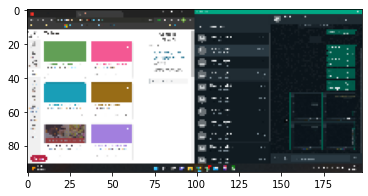

La predicción es:
 [0.00419137 0.9958086 ]


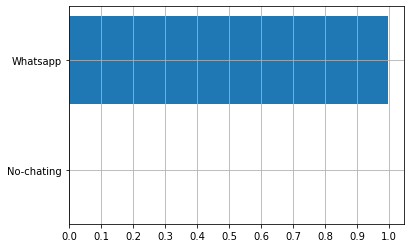


-----------------------------------------------------------------------------------------------------------------

Prueba: 9


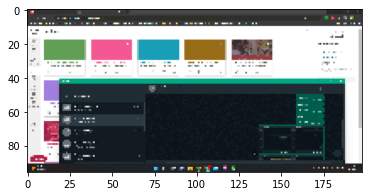

La predicción es:
 [2.0420802e-04 9.9979585e-01]


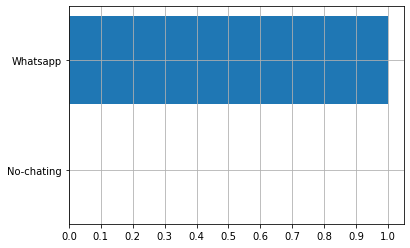


-----------------------------------------------------------------------------------------------------------------

Prueba: 10


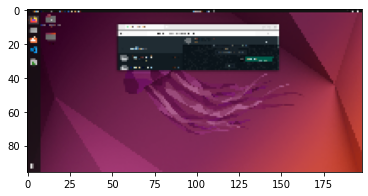

La predicción es:
 [0.5081063  0.49189377]


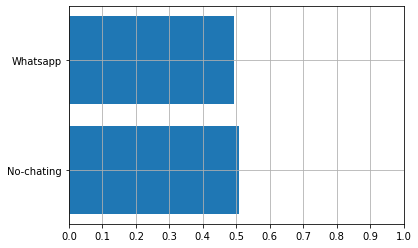


-----------------------------------------------------------------------------------------------------------------

Prueba: 11


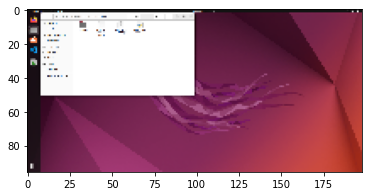

La predicción es:
 [0.6484832  0.35151672]


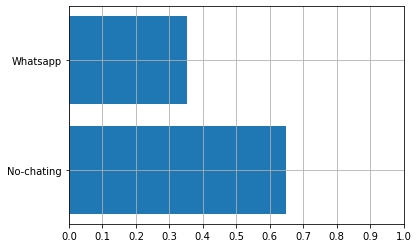


-----------------------------------------------------------------------------------------------------------------

Prueba: 12


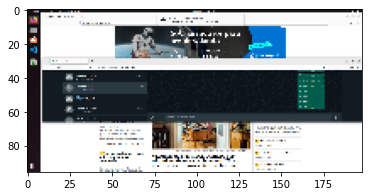

La predicción es:
 [0.00234843 0.99765164]


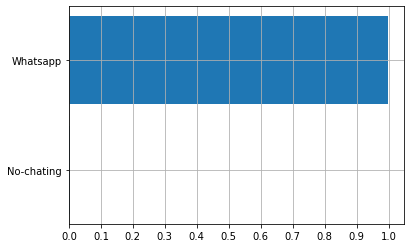


-----------------------------------------------------------------------------------------------------------------

Prueba: 13


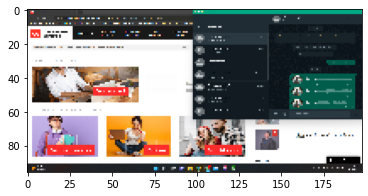

La predicción es:
 [0.0019517 0.9980483]


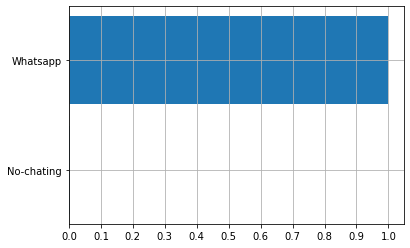


-----------------------------------------------------------------------------------------------------------------

Prueba: 14


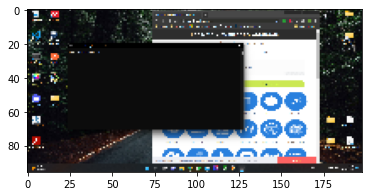

La predicción es:
 [0.7787447  0.22125538]


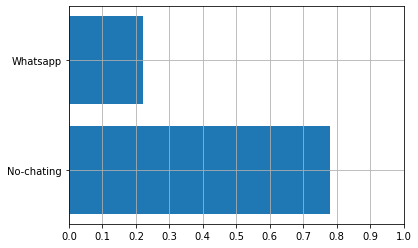


-----------------------------------------------------------------------------------------------------------------

Prueba: 15


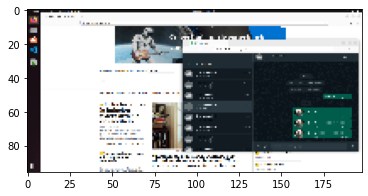

La predicción es:
 [0.02488524 0.97511476]


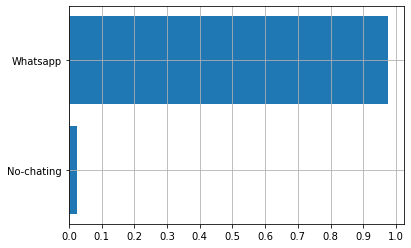


-----------------------------------------------------------------------------------------------------------------

Prueba: 16


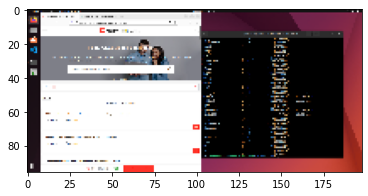

La predicción es:
 [0.9901136  0.00988639]


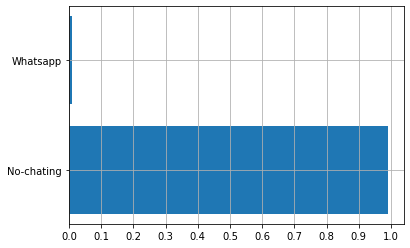


-----------------------------------------------------------------------------------------------------------------

Prueba: 17


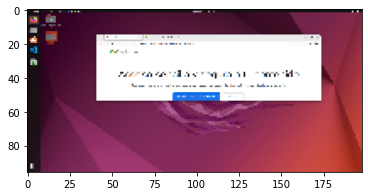

La predicción es:
 [0.85211486 0.14788514]


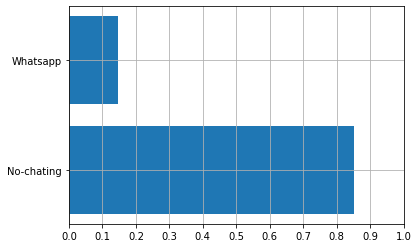


-----------------------------------------------------------------------------------------------------------------

Prueba: 18


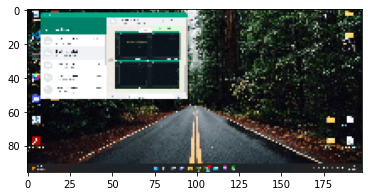

La predicción es:
 [0.1302562  0.86974376]


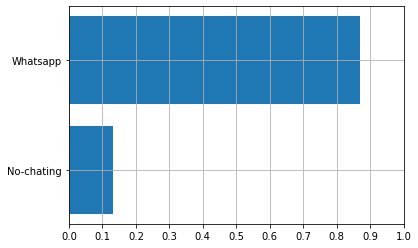


-----------------------------------------------------------------------------------------------------------------

Prueba: 19


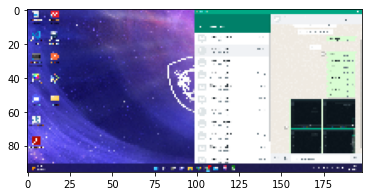

La predicción es:
 [0.15206188 0.8479381 ]


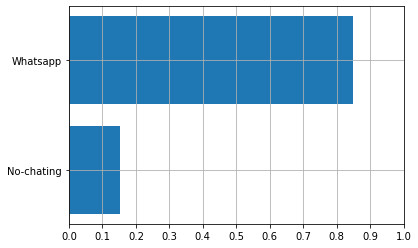


-----------------------------------------------------------------------------------------------------------------

Prueba: 20


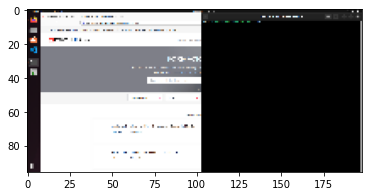

La predicción es:
 [0.96710503 0.03289493]


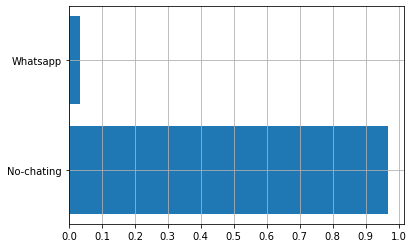


-----------------------------------------------------------------------------------------------------------------

Prueba: 21


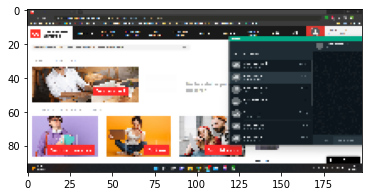

La predicción es:
 [0.0984482  0.90155184]


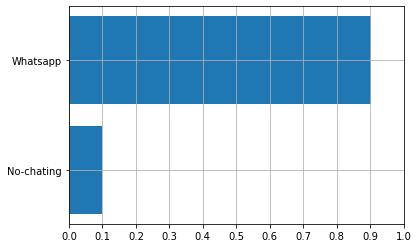


-----------------------------------------------------------------------------------------------------------------

Prueba: 22


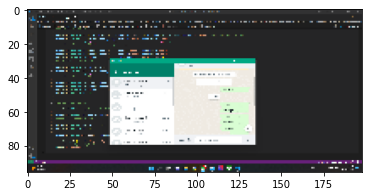

La predicción es:
 [0.3998942 0.6001058]


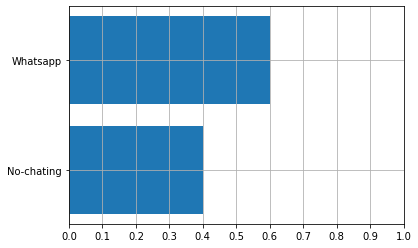


-----------------------------------------------------------------------------------------------------------------

Prueba: 23


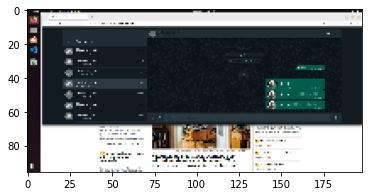

La predicción es:
 [0.00164303 0.998357  ]


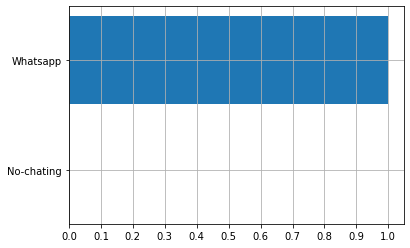


-----------------------------------------------------------------------------------------------------------------

Prueba: 24


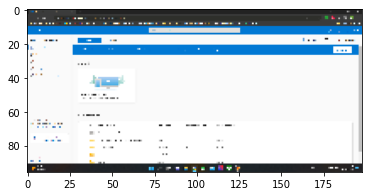

La predicción es:
 [0.9837933  0.01620665]


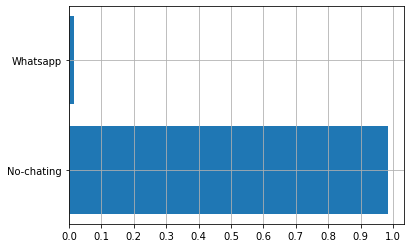


-----------------------------------------------------------------------------------------------------------------

Prueba: 25


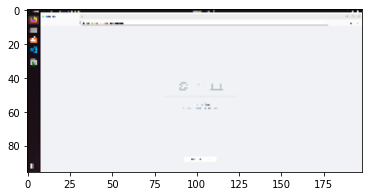

La predicción es:
 [0.6371636 0.3628364]


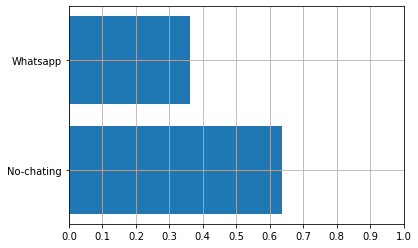


-----------------------------------------------------------------------------------------------------------------

Prueba: 26


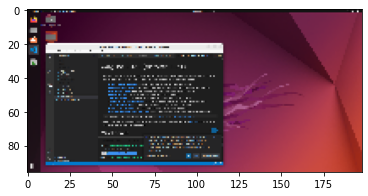

La predicción es:
 [0.95493984 0.04506015]


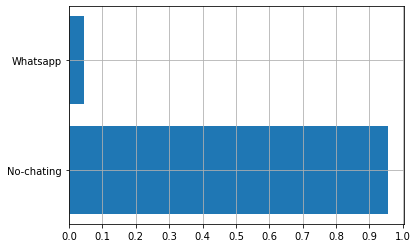


-----------------------------------------------------------------------------------------------------------------

Prueba: 27


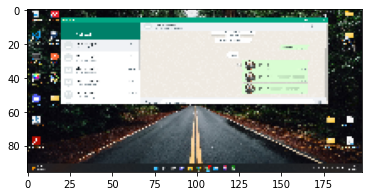

La predicción es:
 [0.01715312 0.9828469 ]


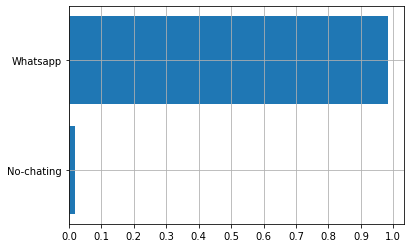


-----------------------------------------------------------------------------------------------------------------

Prueba: 28


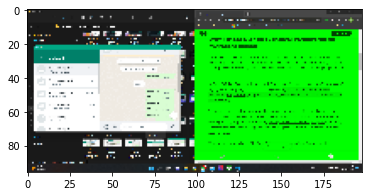

La predicción es:
 [0.7615121  0.23848788]


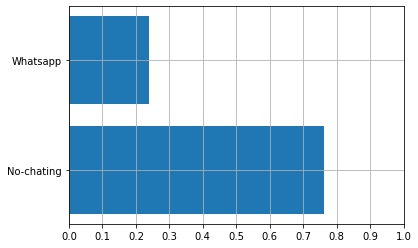


-----------------------------------------------------------------------------------------------------------------

Prueba: 29


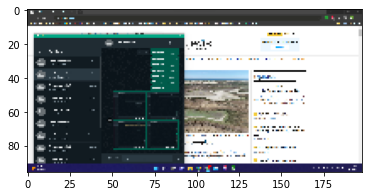

La predicción es:
 [0.00497809 0.99502194]


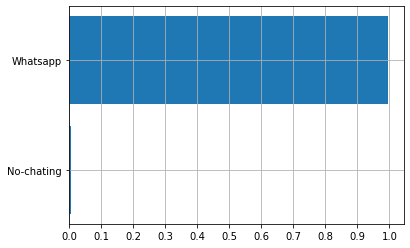


-----------------------------------------------------------------------------------------------------------------

Prueba: 30


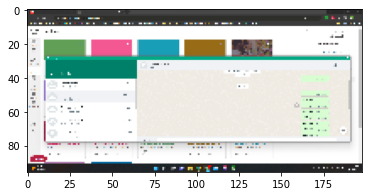

La predicción es:
 [0.1647956  0.83520436]


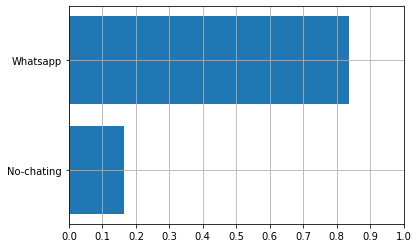


-----------------------------------------------------------------------------------------------------------------

Prueba: 31


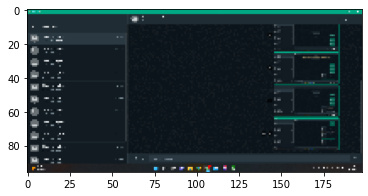

La predicción es:
 [0.00267534 0.9973246 ]


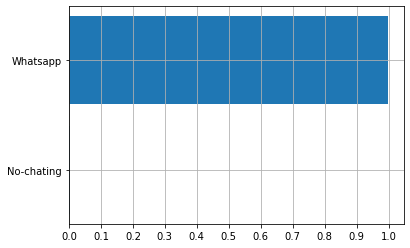


-----------------------------------------------------------------------------------------------------------------

Prueba: 32


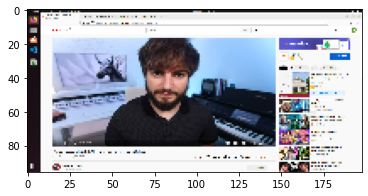

La predicción es:
 [0.89681524 0.10318476]


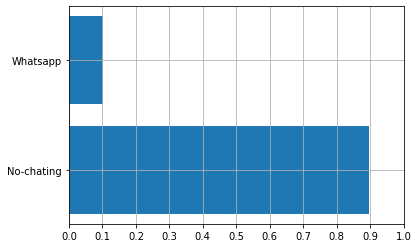


-----------------------------------------------------------------------------------------------------------------

Prueba: 33


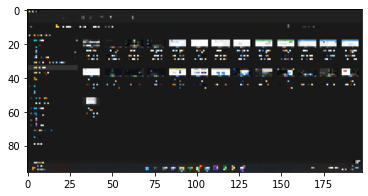

La predicción es:
 [0.8804373  0.11956266]


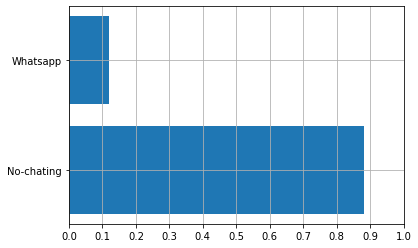


-----------------------------------------------------------------------------------------------------------------

Prueba: 34


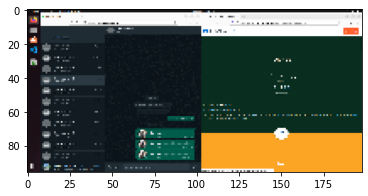

La predicción es:
 [0.00325075 0.9967493 ]


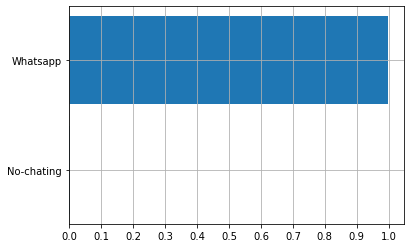


-----------------------------------------------------------------------------------------------------------------

Prueba: 35


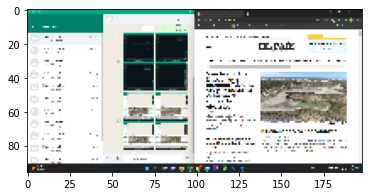

La predicción es:
 [0.12094887 0.8790511 ]


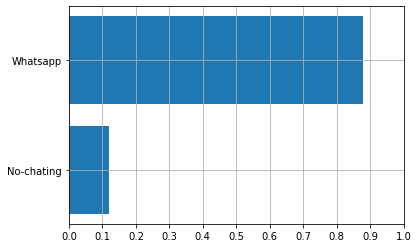


-----------------------------------------------------------------------------------------------------------------

Prueba: 36


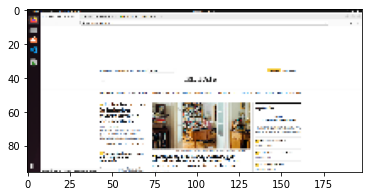

La predicción es:
 [0.47281265 0.52718735]


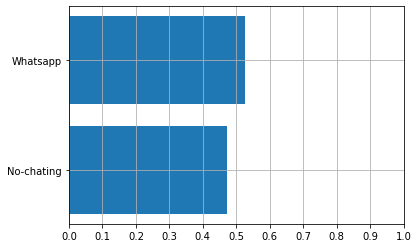


-----------------------------------------------------------------------------------------------------------------

Prueba: 37


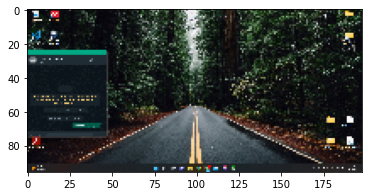

La predicción es:
 [0.07064652 0.9293534 ]


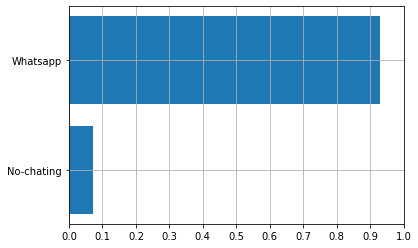


-----------------------------------------------------------------------------------------------------------------

Prueba: 38


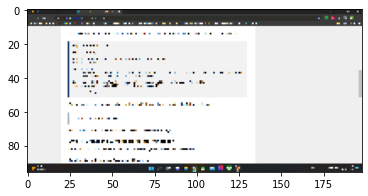

La predicción es:
 [0.9330917  0.06690837]


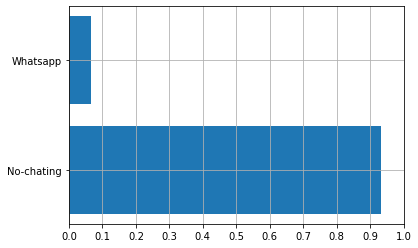


-----------------------------------------------------------------------------------------------------------------

Prueba: 39


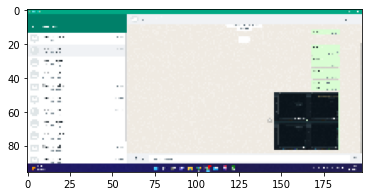

La predicción es:
 [0.00856038 0.9914396 ]


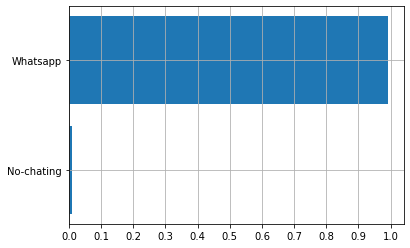


-----------------------------------------------------------------------------------------------------------------

Prueba: 40


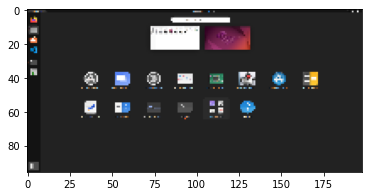

La predicción es:
 [0.30382484 0.6961751 ]


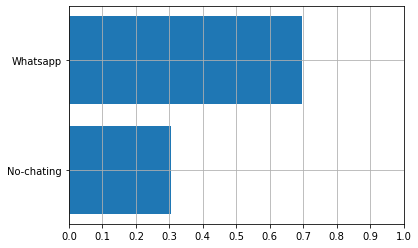


-----------------------------------------------------------------------------------------------------------------

Prueba: 41


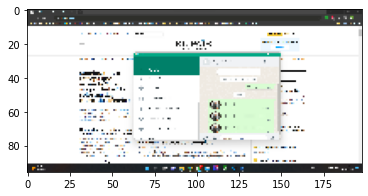

La predicción es:
 [0.04787577 0.95212424]


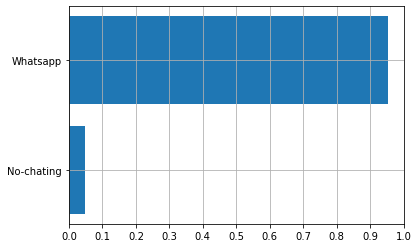


-----------------------------------------------------------------------------------------------------------------

Prueba: 42


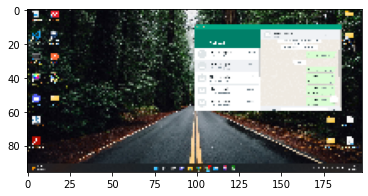

La predicción es:
 [0.00860406 0.991396  ]


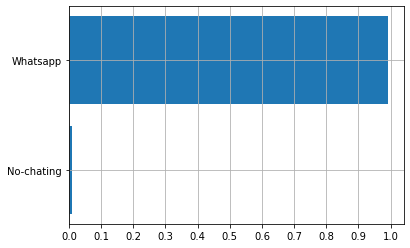


-----------------------------------------------------------------------------------------------------------------

Prueba: 43


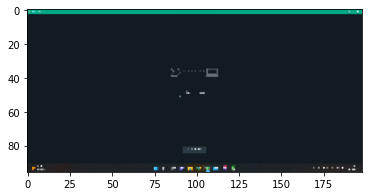

La predicción es:
 [0.22240138 0.7775986 ]


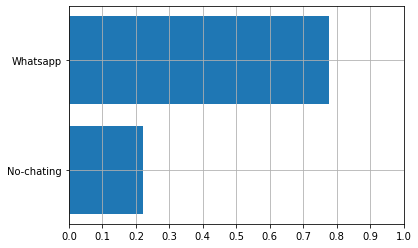


-----------------------------------------------------------------------------------------------------------------

Prueba: 44


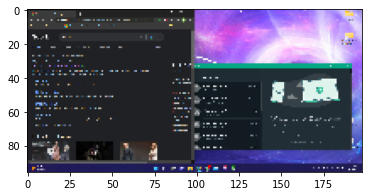

La predicción es:
 [0.00633001 0.99367005]


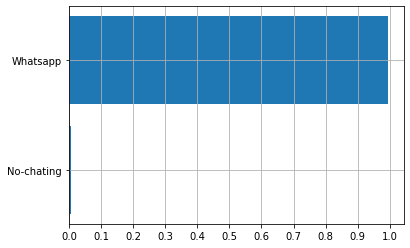


-----------------------------------------------------------------------------------------------------------------

Prueba: 45


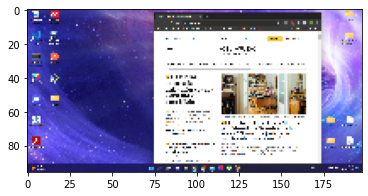

La predicción es:
 [0.98441815 0.01558182]


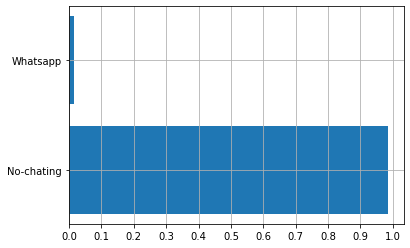


-----------------------------------------------------------------------------------------------------------------

Prueba: 46


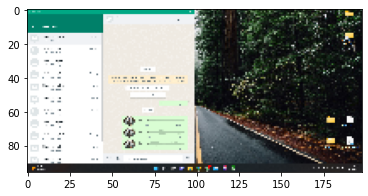

La predicción es:
 [0.17718646 0.8228136 ]


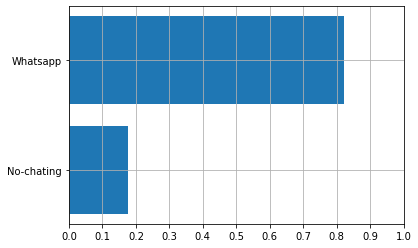


-----------------------------------------------------------------------------------------------------------------

Prueba: 47


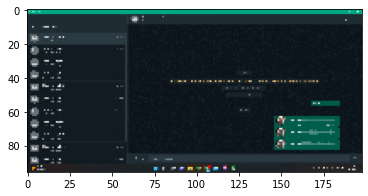

La predicción es:
 [0.00124168 0.9987583 ]


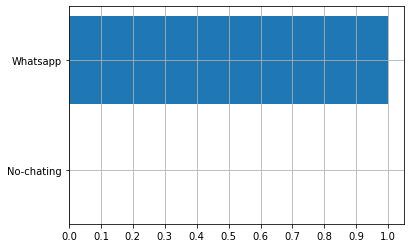


-----------------------------------------------------------------------------------------------------------------

Prueba: 48


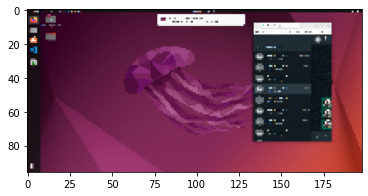

La predicción es:
 [0.01826777 0.9817322 ]


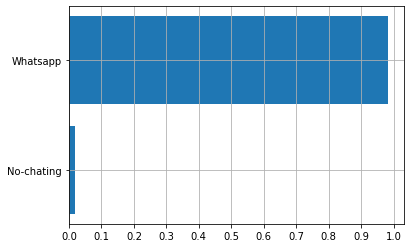


-----------------------------------------------------------------------------------------------------------------

Prueba: 49


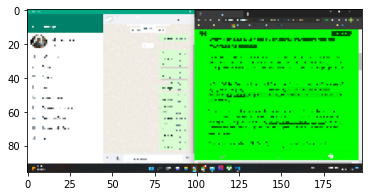

La predicción es:
 [0.20825574 0.79174423]


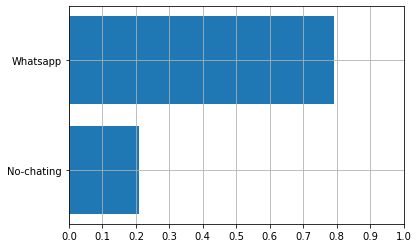


-----------------------------------------------------------------------------------------------------------------

Prueba: 50


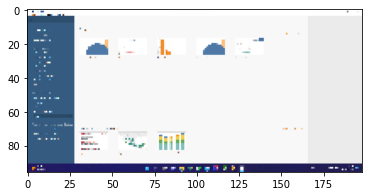

La predicción es:
 [0.96752834 0.03247172]


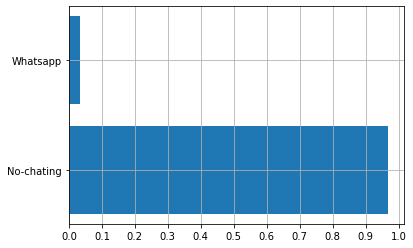


-----------------------------------------------------------------------------------------------------------------

Prueba: 51


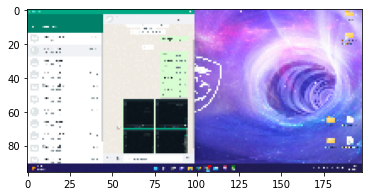

La predicción es:
 [0.5475092  0.45249084]


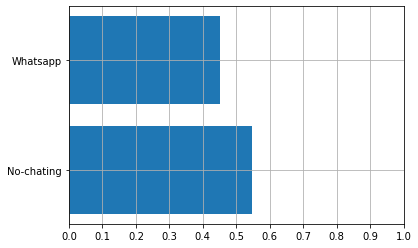


-----------------------------------------------------------------------------------------------------------------

Prueba: 52


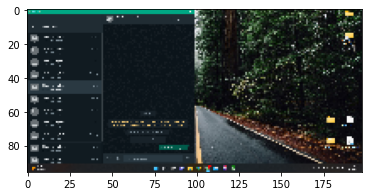

La predicción es:
 [0.00731209 0.99268794]


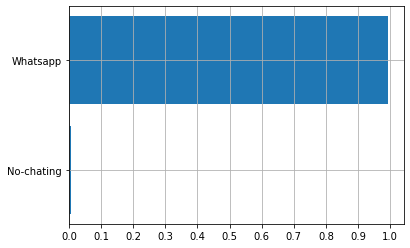


-----------------------------------------------------------------------------------------------------------------

Prueba: 53


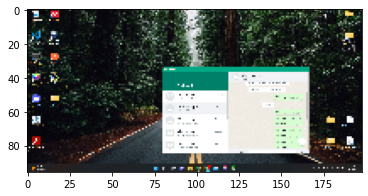

La predicción es:
 [0.07710526 0.9228947 ]


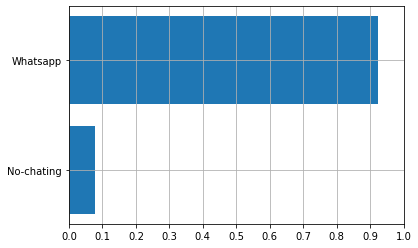


-----------------------------------------------------------------------------------------------------------------

Prueba: 54


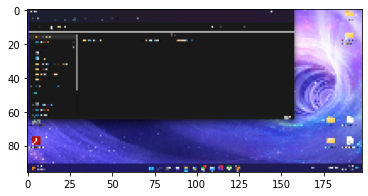

La predicción es:
 [0.2924127 0.7075873]


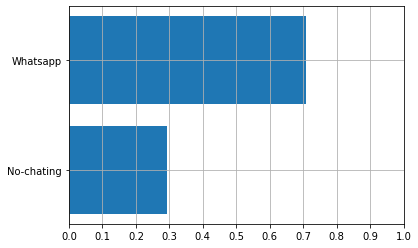


-----------------------------------------------------------------------------------------------------------------

Prueba: 55


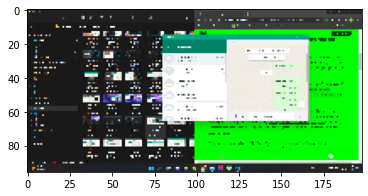

La predicción es:
 [0.80248916 0.19751081]


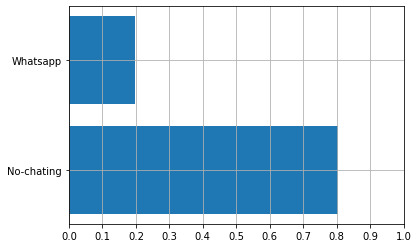


-----------------------------------------------------------------------------------------------------------------

Prueba: 56


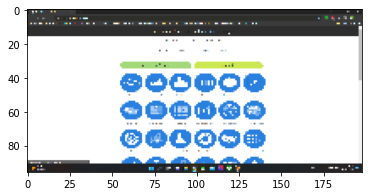

La predicción es:
 [0.9971418  0.00285822]


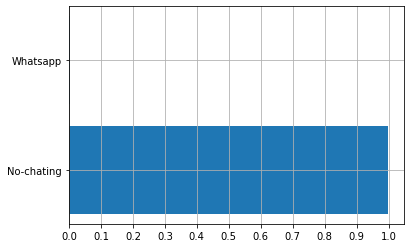


-----------------------------------------------------------------------------------------------------------------

Prueba: 57


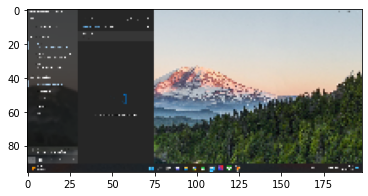

La predicción es:
 [0.6597952  0.34020478]


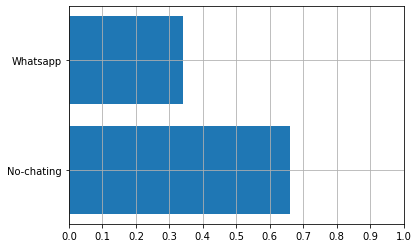


-----------------------------------------------------------------------------------------------------------------

Prueba: 58


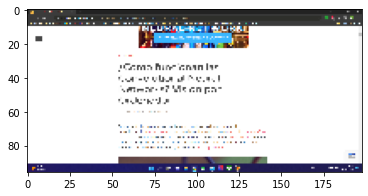

La predicción es:
 [0.9707245  0.02927551]


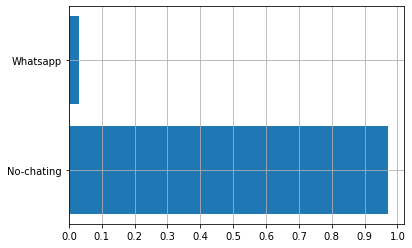


-----------------------------------------------------------------------------------------------------------------

Prueba: 59


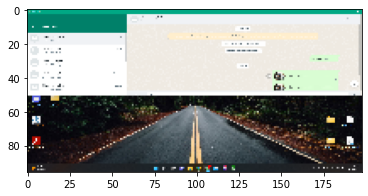

La predicción es:
 [0.00929649 0.9907036 ]


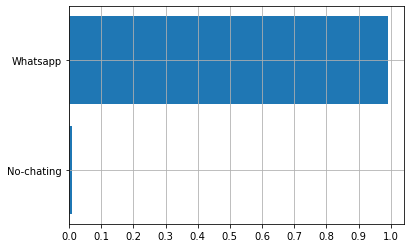


-----------------------------------------------------------------------------------------------------------------

Prueba: 60


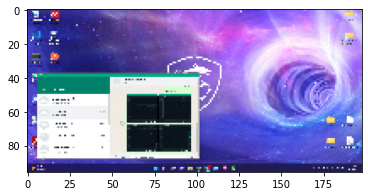

La predicción es:
 [0.66951555 0.33048442]


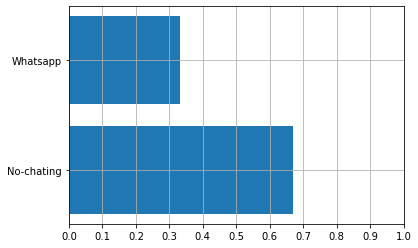


-----------------------------------------------------------------------------------------------------------------

Prueba: 61


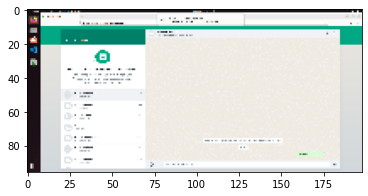

La predicción es:
 [0.02455392 0.9754461 ]


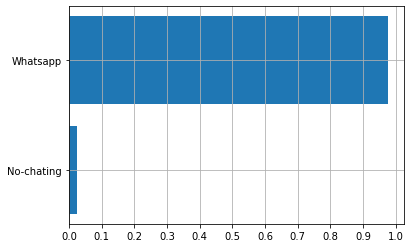


-----------------------------------------------------------------------------------------------------------------



In [44]:
for x in range(0, len(X_test)):
    print("Prueba:", x+1)
    plt.imshow(X_test[x])
    plt.show()
    
    print("La predicción es:\n", prediccion[x])
    
    plt.figure(figsize=(6,4))
    plt.barh(["No-chating","Whatsapp"], prediccion[x])
    plt.grid()
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    plt.show()
    
    print("\n-----------------------------------------------------------------------------------------------------------------\n")